In [3]:
# ============================================
# Breast Cancer 분류 (DL, Keras Sequential)
# 라벨: label (0/1)
# 출력: 학습/검증 곡선, Classification Report, Confusion Matrix
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

In [4]:
# --------------------------------------------
# 1) 데이터 로드
#    - Colab 경로로 쓰는 경우: CSV_PATH를 드라이브 내 경로로 바꿔주세요.
#    - 지금은 기본값을 'breast_cancer.csv'로 둡니다.
# --------------------------------------------
CSV_PATH = r"/content/drive/MyDrive/Col/머신러닝 2주차/breast_cancer.csv"

df = pd.read_csv(CSV_PATH)

In [5]:
# --------------------------------------------
# 2) 라벨/특징 분리
#    - 라벨 컬럼 이름은 'label'(0/1)로 가정
#    - 만약 다른 이름이면 여기서 바꿔주세요. 예: target, diagnosis 등
# --------------------------------------------
assert "label" in df.columns, f"'label' 컬럼이 없습니다. 실제 컬럼: {list(df.columns)[:10]} ..."
y = df["label"].astype(int).values
X = df.drop(columns=["label"]).values

print("\n[클래스 분포] (0/1)")
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)), "\n")


[클래스 분포] (0/1)
{np.int64(0): np.int64(212), np.int64(1): np.int64(357)} 



In [6]:
# --------------------------------------------
# 3) Train/Test 분리 + 스케일링
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [7]:
# --------------------------------------------
# 4) 모델 정의/학습 (이진분류: sigmoid + binary_crossentropy)
# --------------------------------------------
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # binary
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7457 - loss: 0.5651 - val_accuracy: 0.9780 - val_loss: 0.3003
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.2638 - val_accuracy: 0.9890 - val_loss: 0.1569
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9629 - loss: 0.1513 - val_accuracy: 0.9890 - val_loss: 0.1019
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9805 - loss: 0.1213 - val_accuracy: 0.9890 - val_loss: 0.0750
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9775 - loss: 0.0905 - val_accuracy: 0.9890 - val_loss: 0.0600
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9691 - loss: 0.0755 - val_accuracy: 0.9890 - val_loss: 0.0509
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9771 - loss: 0.0746 - val_accuracy: 0.9890 - val_loss: 0.0469
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9811 - loss: 0.0614 - val_accuracy: 0.9890 - val_loss

In [8]:
# --------------------------------------------
# 5) 예측/평가
# --------------------------------------------
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9524    0.9524    0.9524        42
           1     0.9722    0.9722    0.9722        72

    accuracy                         0.9649       114
   macro avg     0.9623    0.9623    0.9623       114
weighted avg     0.9649    0.9649    0.9649       114

=== Confusion Matrix ===
[[40  2]
 [ 2 70]]


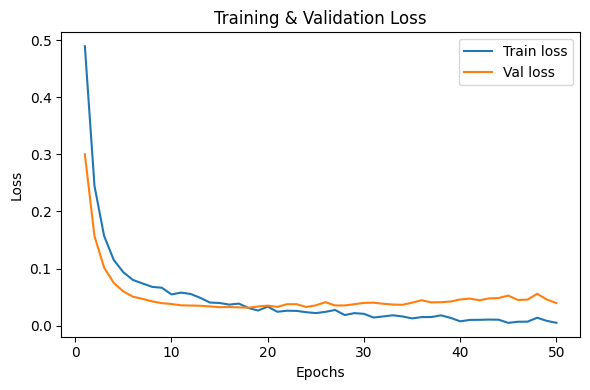

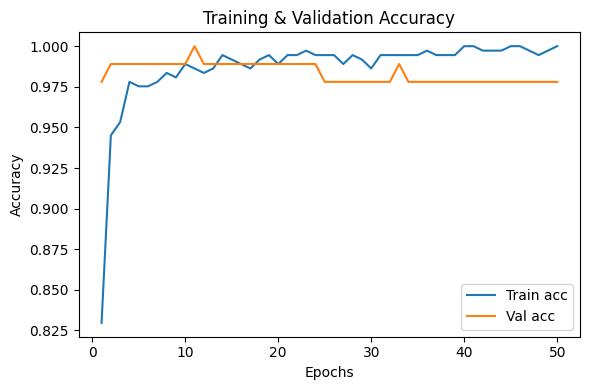

In [9]:
# --------------------------------------------
# 6) 학습 곡선 시각화
# --------------------------------------------
epochs = range(1, len(history.history["loss"]) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, history.history["loss"], label="Train loss")
plt.plot(epochs, history.history["val_loss"], label="Val loss")
plt.title("Training & Validation Loss"); plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, history.history["accuracy"], label="Train acc")
plt.plot(epochs, history.history["val_accuracy"], label="Val acc")
plt.title("Training & Validation Accuracy"); plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout(); plt.show()